In [1]:
suppressMessages(library(rwwa))

In [2]:
varnm = "rx3day"

In [9]:
fl = list.files("res-obs", pattern = "gmstonly_rx3day", full.names = T)

In [5]:
sapply(fl, function(fnm) {
    
})

[1] "chirps_trend_results_gmstonly_rx3day.csv" 
[2] "cpc_trend_results_gmstonly_rx3day.csv"    
[3] "ERA_trend_results_gmstonly_rx3day.csv"    
[4] "ERA1979_trend_results_gmstonly_rx3day.csv"

In [10]:
fnm <- fl[1]

In [20]:
res_obs <- t(sapply(list.files("res-obs", pattern = "gmstonly_rx3day", full.names = T), function(fnm) {
    res <- read.csv(fnm, row.names = "X")
    unlist(lapply(rownames(res), function(cnm) setNames(res[cnm,], paste(gsub("_", "-", cnm), c("est", "lower", "upper"), sep = "_"))))
}))
rownames(res_obs) <- sapply(strsplit(substr(rownames(res_obs),9,99), "_"), "[", 1)

In [23]:
write.csv(res_obs, paste0("res-obs_",varnm,"_gmst-only.csv"))

## Synthesis

In [32]:
res_obs <- read.csv("res-obs_rx3day_gmst-only.csv", row.names ="X")

In [30]:
res_mdl <- read.csv("res-cordex_rx3day_gmst-only.csv", row.names ="X.1")

In [41]:
synth <- synthesis(obs_in = res_obs[,grepl("dI.rel.pi", colnames(res_obs))],
                   models_in = res_mdl[,grepl("attr_dI.rel", colnames(res_mdl))],
                   synth_type = "rel")

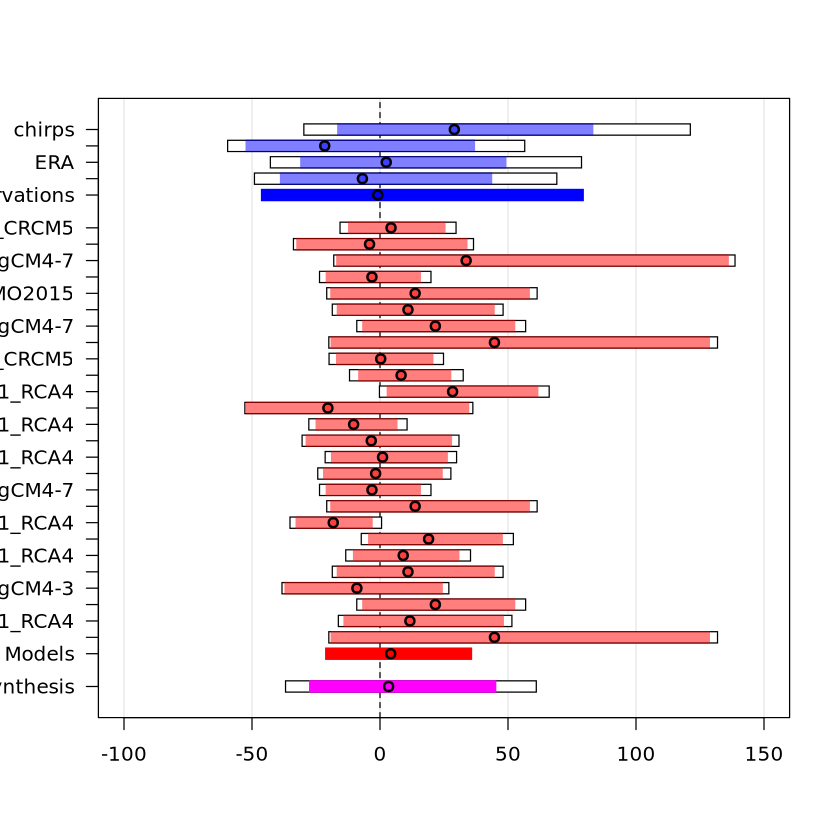

In [42]:
plot_synthesis(synth)